In [1]:
import pandas as pd
import numpy as np

import cmsdials
from cmsdials import Dials
from cmsdials.auth.bearer import Credentials
from cmsdials.filters import (
    FileIndexFilters,
    LumisectionHistogram1DFilters,
    LumisectionHistogram2DFilters,
    LumisectionFilters,
    RunFilters
)

creds = Credentials.from_creds_file()
dials = Dials(creds, nthreads=2)

In [2]:
import matplotlib.pyplot as plt
import mplhep as hep
import awkward as ak

In [3]:
hep.style.use("CMS")

In [4]:
# dials.run.list_all(RunFilters(min_run_number=360392, max_run_number=365000), max_pages=5)
dials.run.list_all(RunFilters(min_run_number=379390, max_run_number=399000),max_pages=10)

PaginatedRunList(count=12, next=None, previous=None, results=[Run(run_number=379390, ls_count=238), Run(run_number=379391, ls_count=670), Run(run_number=379413, ls_count=8), Run(run_number=379415, ls_count=61), Run(run_number=379416, ls_count=233), Run(run_number=379420, ls_count=466), Run(run_number=379425, ls_count=235), Run(run_number=379433, ls_count=53), Run(run_number=379441, ls_count=1), Run(run_number=379442, ls_count=291), Run(run_number=379443, ls_count=11), Run(run_number=379454, ls_count=446)])

In [5]:
Ls1Dhist = LumisectionHistogram1DFilters(title="PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1",min_entries= 1000,min_run_number=379_390)

data = dials.h1d.list_all(Ls1Dhist,max_pages=100)


# Using Awkward Arrays

In [6]:
# For plotting I think using this library might be better
a1 = ak.Array([i.dict() for i in data.results])

In [7]:
a1.type

1000 * {"hist_id": int64, "file_id": int64, "run_number": int64, "ls_id": int64, "title": string, "x_min": float64, "x_max": float64, "x_bin": float64, "entries": int64, "data": var * float64}

In [8]:
a1['edges'] = np.linspace(a1.x_min,a1.x_max,num=101).to_numpy().T

run = a1[a1.run_number == 379391]

In [9]:
def make_histo(data , ax, **kwargs) -> None:
    ax.set_title(kwargs.pop("title",None))
    ax.set_xlabel(kwargs.pop("xlabel",None))
    ax.set_ylabel(kwargs.pop("ylabel",None))
    for i in range(len(data)):
        ax.stairs(values = data.data[i], edges = data.edges[i] , **kwargs)


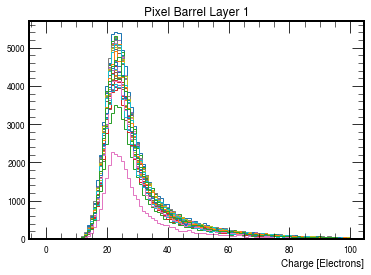

In [10]:
fig,ax = plt.subplots()
make_histo(run[::20],ax,
           title = "Pixel Barrel Layer 1", xlabel= "Charge [Electrons]")

# Trying with Pandas

In [11]:
# We can convert it to a table using pandas

df = pd.DataFrame([x.__dict__ for x in data.results])
df


,hist_id,file_id,run_number,ls_id,title,x_min,x_max,x_bin,entries,data
0,15312580,14181863237,379390,71968955137,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,-0.5,99.5,100.0,93755,"[0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 2.0, 6.0, 6.0, ..."
1,15312675,14181863237,379390,71969334530,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,-0.5,99.5,100.0,93708,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 0.0, 5.0, ..."
2,15312770,14181863237,379390,71970472715,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,-0.5,99.5,100.0,100045,"[0.0, 0.0, 0.0, 1.0, 0.0, 3.0, 2.0, 1.0, 13.0,..."
3,15312865,14181863237,379390,71970852112,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,-0.5,99.5,100.0,88892,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 6.0, ..."
4,15312960,14181863237,379390,71971231510,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,-0.5,99.5,100.0,96131,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 7.0, 13.0,..."
...,...,...,...,...,...,...,...,...,...,...
995,15428670,14184817397,379415,71997412362,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,-0.5,99.5,100.0,33968,"[0.0, 0.0, 0.0, 1.0, 7.0, 15.0, 21.0, 26.0, 33..."
996,15428765,14184817397,379415,71997791830,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,-0.5,99.5,100.0,52954,"[0.0, 0.0, 0.0, 7.0, 21.0, 33.0, 34.0, 45.0, 3..."
997,15428860,14184817397,379415,71998171299,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,-0.5,99.5,100.0,33219,"[0.0, 0.0, 0.0, 3.0, 12.0, 13.0, 23.0, 25.0, 3..."
998,15428955,14184817397,379415,71998550769,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,-0.5,99.5,100.0,20322,"[0.0, 0.0, 0.0, 2.0, 5.0, 6.0, 12.0, 13.0, 16...."


In [12]:
import numpy as np
edges = np.linspace(df.x_min,df.x_max,101).T
df.loc[:,'edges'] = list(edges)
df_run = df[df.run_number == 379391]
df_run

,hist_id,file_id,run_number,ls_id,title,x_min,x_max,x_bin,entries,data,edges
126,15324550,14182283757,379391,71975404953,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,-0.5,99.5,100.0,80500,"[0.0, 0.0, 0.0, 2.0, 0.0, 1.0, 1.0, 3.0, 5.0, ...","[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5,..."
127,15324645,14182283757,379391,71975784363,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,-0.5,99.5,100.0,84771,"[0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 2.0, 2.0, 8.0, ...","[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5,..."
128,15324740,14182283757,379391,71978440261,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,-0.5,99.5,100.0,85231,"[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 2.0, 5.0, 4.0, ...","[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5,..."
129,15324835,14182283757,379391,71978819679,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,-0.5,99.5,100.0,86828,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 5.0, ...","[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5,..."
130,15324930,14182283757,379391,72013350903,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,-0.5,99.5,100.0,81557,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, ...","[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5,..."
...,...,...,...,...,...,...,...,...,...,...,...
780,15390765,14184090157,379391,72139783011,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,-0.5,99.5,100.0,66857,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 4.0, ...","[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5,..."
781,15390860,14184090157,379391,72183471511,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,-0.5,99.5,100.0,65234,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5,..."
782,15390955,14184090157,379391,72183851469,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,-0.5,99.5,100.0,63664,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 4.0, ...","[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5,..."
783,15391050,14184090157,379391,72219952039,PixelPhase1/Tracks/PXBarrel/charge_PXLayer_1,-0.5,99.5,100.0,63166,"[0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 2.0, 1.0, 2.0, ...","[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5,..."


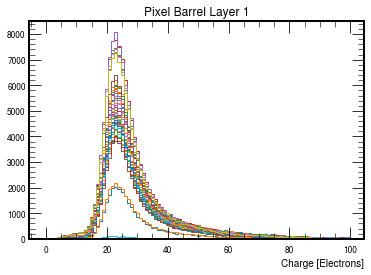

In [14]:
fig,ax = plt.subplots()
make_histo(df.iloc[::20].reset_index(),ax,
           title = "Pixel Barrel Layer 1", xlabel= "Charge [Electrons]")

    